In [178]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd
import seaborn as sns
color = sns.color_palette()
import sklearn.metrics as metrics
import imblearn
import warnings
warnings.filterwarnings("ignore")

In [179]:
data = pd.read_csv("financial_data.csv")
data.head()

,default,student,balance,income
0,No,No,729.53,44361.63
1,No,Yes,817.18,12106.13
2,No,No,1073.55,31767.14
3,No,No,529.25,35704.49
4,No,No,785.66,38463.50


In [180]:
data.shape

(10000, 4)

In [181]:
data.describe()

,balance,income
count,10000.000000,10000.000000
mean,835.374877,33516.981852
std,483.714957,13336.639582
min,0.000000,771.970000
25%,481.732500,21340.460000
50%,823.635000,34552.645000
75%,1166.305000,43807.730000
max,2654.320000,73554.230000


## Exploratory Data Analysis

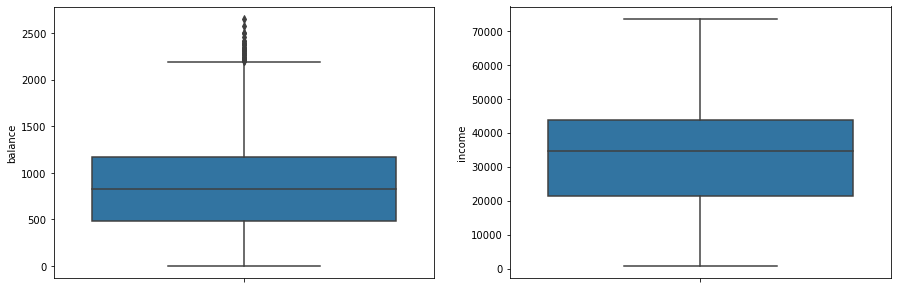

In [182]:
# Box plot to understand the spread of the data
plt.figure(figsize = (15,5))
plt.subplot(1,2,1)
sns.boxplot(y= data['balance'])

plt.subplot(1,2,2)
sns.boxplot(y= data['income'])
plt.show()

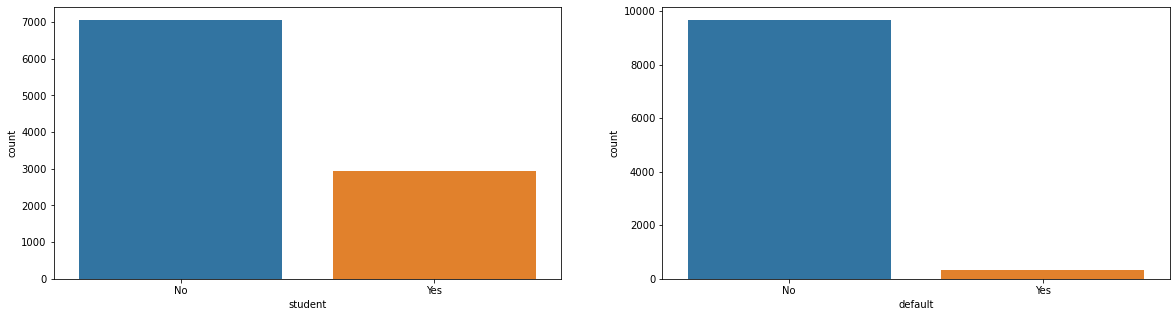

In [183]:
# Countplot to analysze categorical columns
plt.figure(figsize = (20,5))
plt.subplot(1,2,1)
sns.countplot(data['student'])

plt.subplot(1,2,2)
sns.countplot(data['default'])
plt.show()

In [184]:
data['student'].value_counts(normalize = True)

No     0.7056
Yes    0.2944
Name: student, dtype: float64

In [185]:
data['default'].value_counts(normalize = True)

No     0.9667
Yes    0.0333
Name: default, dtype: float64

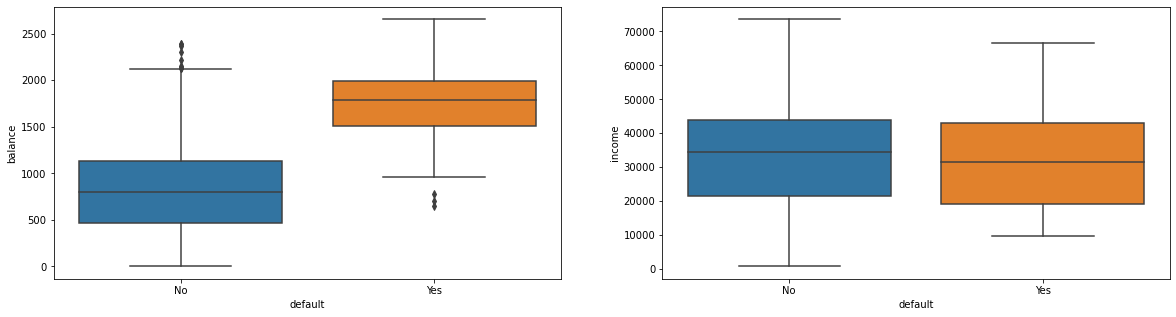

In [186]:
plt.figure(figsize = (20,5))
plt.subplot(1,2,1)
sns.boxplot(data['default'], data['balance'])

plt.subplot(1,2,2)
sns.boxplot(data['default'], data['income'])
plt.show()

In [187]:
pd.crosstab(data['student'], data['default'], normalize = 'index').round(2)

default,No,Yes
student,,
No,0.97,0.03
Yes,0.96,0.04


<AxesSubplot:>

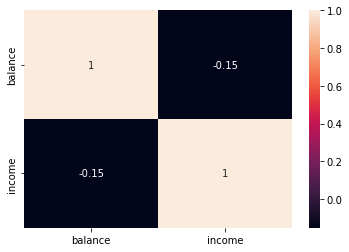

In [188]:
sns.heatmap(data[['balance', 'income']].corr(), annot = True)

In [189]:
data.isnull().sum()

default    0
student    0
balance    0
income     0
dtype: int64

In [190]:
Q1, Q3 = data['balance'].quantile([.25,.75])
IQR = Q3 - Q1
LL = Q1 - 1.5*(IQR)
UL = Q3 + 1.5*(IQR)

In [191]:
UL

2193.16375

In [192]:
df = data[data['balance'] > UL]
df

,default,student,balance,income
173,Yes,Yes,2205.80,14271.49
1136,Yes,No,2499.02,51504.29
1160,Yes,Yes,2502.68,14947.52
1359,Yes,No,2220.97,40725.10
1502,Yes,Yes,2332.88,11770.23
1609,Yes,Yes,2269.95,18021.11
2096,Yes,Yes,2261.85,20030.17
2140,No,Yes,2308.89,19110.27
2929,Yes,Yes,2387.31,28296.91
3162,Yes,Yes,2415.32,17429.50


In [193]:
df['default'].count()

31

In [194]:
df['default'].value_counts(normalize = True)

Yes    0.83871
No     0.16129
Name: default, dtype: float64

In [195]:
df['default'].value_counts()

Yes    26
No      5
Name: default, dtype: int64

In [196]:
data['balance'] = np.where(data['balance'] > UL, UL, data['balance'])

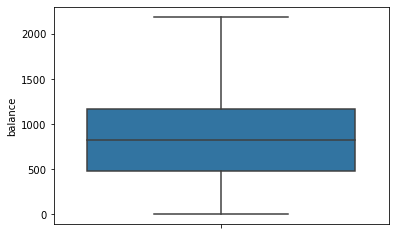

In [197]:
sns.boxplot(y = data['balance'])
plt.show()

In [198]:
# preparing model

data = pd.get_dummies(data, drop_first = True)

In [199]:
data.columns = ['balance', 'income', 'default', 'student']

In [200]:
data

,balance,income,default,student
0,729.53,44361.63,0,0
1,817.18,12106.13,0,1
2,1073.55,31767.14,0,0
3,529.25,35704.49,0,0
4,785.66,38463.50,0,0
...,...,...,...,...
9995,711.56,52992.38,0,0
9996,757.96,19660.72,0,0
9997,845.41,58636.16,0,0
9998,1569.01,36669.11,0,0


In [201]:
# training and testing dataset

from sklearn.model_selection import train_test_split

# X is independant variable
X = data.drop('default', axis=1)

#y is dependant variable is default
y = data['default']

In [202]:
#stratified testing as to split values of y eaually in train and test data
X_train, X_test, y_train , y_test = train_test_split(X, y, test_size = 0.3, random_state = 21, stratify = y)

In [203]:
print(X_train.shape)
print(X_test.shape)

(7000, 3)
(3000, 3)


In [204]:
print(y_train.value_counts(normalize = True).round(2))
print(y_test.value_counts(normalize = True).round(2))


0    0.97
1    0.03
Name: default, dtype: float64
0    0.97
1    0.03
Name: default, dtype: float64


In [205]:
# SMOTE is used for oversampling
# the ratio of deafault is 4:3 (non default: default)

from imblearn.over_sampling import SMOTE 
sm = SMOTE(random_state=33, sampling_strategy = 0.75)
X_res, y_res = sm.fit_resample(X_train, y_train)


In [206]:
# Logistic Regression Model

from sklearn.linear_model import LogisticRegression

In [207]:
lr = LogisticRegression()

In [208]:
lr.fit(X_res,y_res)

LogisticRegression()

In [209]:
y_pred=lr.predict(X_test)

In [210]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred )

array([[2589,  311],
       [  25,   75]], dtype=int64)

In [211]:
accuracy = (2589 + 75) / (2589 + 75 + 25 + 311) *100

In [212]:
accuracy

88.8